In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
df= pd.read_csv(r"/content/SalesSummary (2).csv")

In [3]:
df.head(20)

,CustomerID,Country,InvoiceNo,InvoiceDate,StockCode,Description,UnitPrice,Quantity,TotalPrice,TotalItemPrice
0,13426,United Kingdom,579439,2011-11-29 13:29:00.000,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,2.55,32.0,81.60,81.60
1,14388,United Kingdom,579440,2011-11-29 13:32:00.000,23580,SNACK TRAY HAPPY FOREST,1.95,8.0,15.60,15.60
2,14388,United Kingdom,579440,2011-11-29 13:32:00.000,23581,JUMBO BAG PAISLEY PARK,1.79,10.0,20.80,17.90
3,14388,United Kingdom,579440,2011-11-29 13:32:00.000,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1.95,10.0,20.80,19.50
4,14388,United Kingdom,579440,2011-11-29 13:32:00.000,23202,JUMBO BAG VINTAGE LEAF,2.08,10.0,20.80,20.80
5,14388,United Kingdom,579440,2011-11-29 13:32:00.000,23582,VINTAGE DOILY JUMBO BAG RED,2.08,10.0,20.80,20.80
6,14388,United Kingdom,579440,2011-11-29 13:32:00.000,23344,JUMBO BAG 50'S CHRISTMAS,2.08,30.0,62.40,62.40
7,14388,United Kingdom,579440,2011-11-29 13:32:00.000,85099B,JUMBO BAG RED RETROSPOT,1.65,10.0,20.80,16.50
8,14388,United Kingdom,579440,2011-11-29 13:32:00.000,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.95,10.0,20.80,19.50
9,14388,United Kingdom,579440,2011-11-29 13:32:00.000,23240,SET OF 4 KNICK KNACK TINS DOILEY,4.15,6.0,24.90,24.90


In [4]:
#Drop ["Country","InvoiceNo","StockCode","CustomerID", "Description", "TotalItemPrice"] Columns
df=df.drop(["Country","InvoiceNo","StockCode","CustomerID", "Description", "TotalItemPrice"],axis=1)

In [5]:
#check for nulls
df.isna().sum()

,0
InvoiceDate,0
UnitPrice,1
Quantity,1
TotalPrice,1


In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

,0
InvoiceDate,0
UnitPrice,0
Quantity,0
TotalPrice,0


In [8]:
#check for duplicated
df.duplicated().sum()

15433

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
#check for duplicated
df.duplicated().sum()

0

In [11]:

# Assuming your DataFrame is named 'df' and the column is 'InvoiceDate'
# Replace invalid hour values (e.g., 29:00.0) with valid ones (e.g., 01:00.0)
# or by adding a day to the date for hours >= 24
def fix_hour(time_str):
    """
    Fixes the hour in the time string if it is greater than 23.
    """
    try:
        # Attempt to parse the time string directly
        pd.to_datetime(time_str)
        return time_str
    except ValueError:
        # If parsing fails (hour > 23), assume the next day
        hour, rest = time_str.split(':')
        if int(hour) >= 24:
            hour = str(int(hour) % 24)
            return hour + ':' + rest
        else:
            return time_str


df['InvoiceDate'] = df['InvoiceDate'].apply(fix_hour)

# Now convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
# 1. Convert 'InvoiceDate' to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [13]:
# 2. Extract relevant features from 'InvoiceDate'
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceYear'] = df['InvoiceDate'].dt.year

In [14]:
# 3. Define features and target
x = df[['InvoiceDay', 'InvoiceMonth', 'InvoiceYear', 'UnitPrice', 'Quantity']]  # Include the new features
y = df['TotalPrice']

In [15]:
# 4. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=33, shuffle=True)

In [16]:
# 5. Scale the numerical features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [17]:
# 6. Create and train the SVM model for regression
from sklearn.svm import SVR  # Import SVR for regression tasks

model = SVR(kernel='linear')  # Use SVR instead of SVC
# You can experiment with other kernels like 'rbf', 'poly' for SVR as well
model.fit(x_train, y_train)  # This line trains the model

SVR(kernel='linear')

In [18]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [19]:
# Replace accuracy_score with appropriate regression metrics
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2} ")

Mean Squared Error: 193040.39080941706
R-squared: 0.8347080546830126 


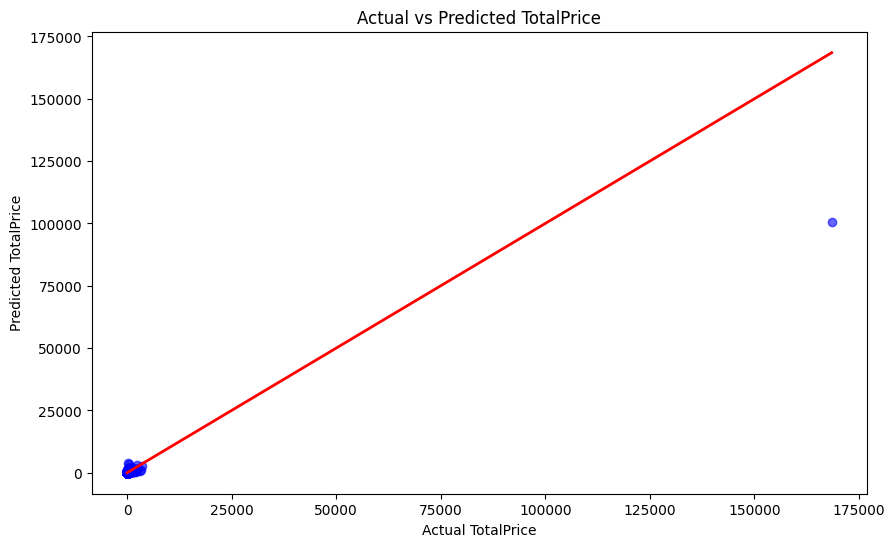

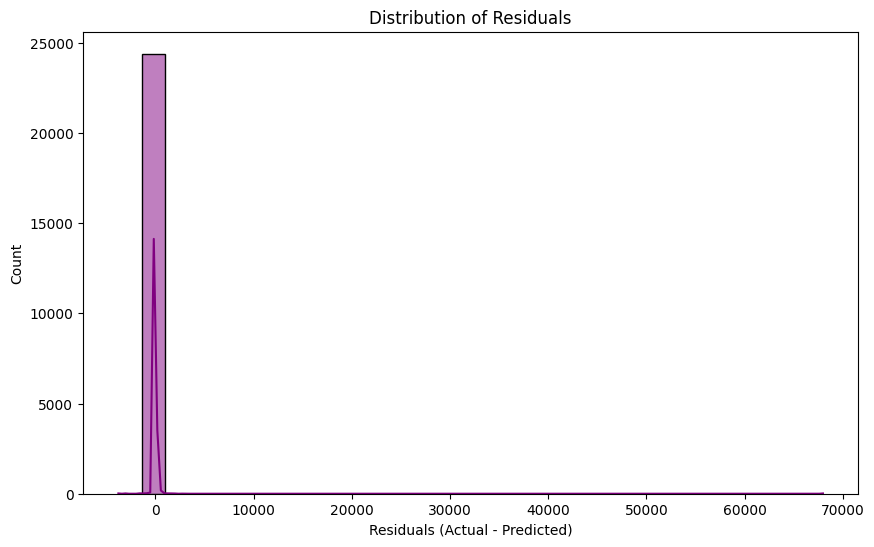

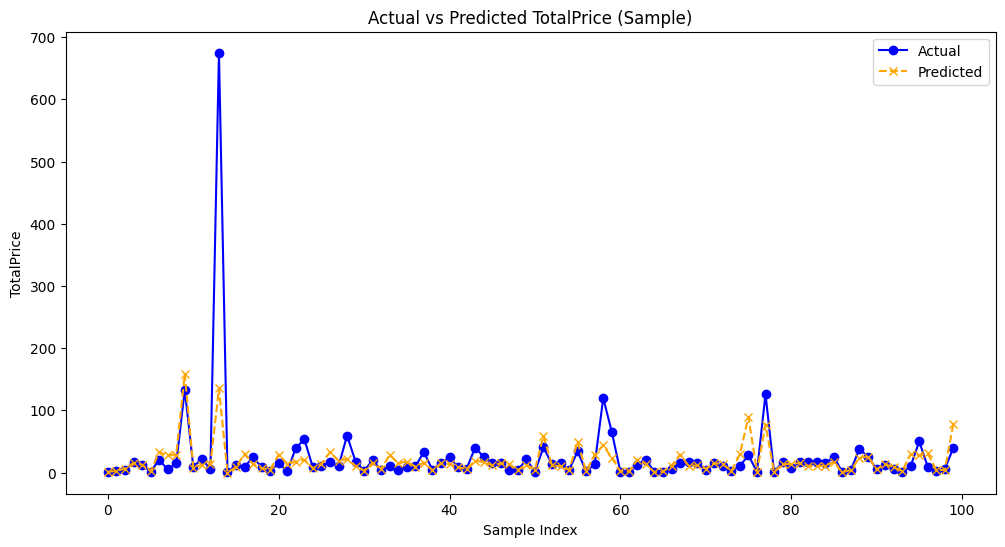

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Actual vs Predicted TotalPrice')
plt.show()

# Step 2: Residual Plot (difference between actual and predicted values)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Distribution of Residuals')
plt.show()

# Step 3: Line plot of a sample of predictions vs actual values
plt.figure(figsize=(12, 6))
sample_indices = range(100)  # Plot the first 100 points for simplicity
plt.plot(sample_indices, y_test[:100], label='Actual', color='blue', marker='o')
plt.plot(sample_indices, y_pred[:100], label='Predicted', color='orange', linestyle='--', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('TotalPrice')
plt.title('Actual vs Predicted TotalPrice (Sample)')
plt.legend()
plt.show()
